In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./Travel.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


## Data Cleaning
    1. Handel Missing Values
    2. Handel Duplicate
    3. Check data type
    4. understand the dataset

In [3]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [4]:
# Check all categorical features

df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [5]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [6]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [10]:
df['Gender'] = df['Gender'].replace('Fe Male','Female')
df['MaritalStatus'] = df['MaritalStatus'].replace('Single','Unmarried')

In [11]:
## Check Missing Values
feature_with_na = [feature for feature in df.columns if df[feature].isnull().sum()>=1]
for feature in feature_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5),'% missing values')

Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


In [12]:
# Statistics on numerical col(null col)

df[feature_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


## Imputing Null Values
    1. Median for Age
    2. Mode for Type of contract
    3. Median for Duration of Pitch
    4. Mode for Number of Follow up as it is Discrete Feature
    5. Mode for Preferred Property Star
    6. Median for Number of Tips
    7. Mode for Number of Children Visiting
    8. Median for Monthly Income

In [15]:
# age
df['Age'].fillna(df['Age'].median(),inplace=True)

# Typeofcontract
df['TypeofContact'].fillna(df.TypeofContact.mode()[0],inplace=True)

#Durationofpitch
df['DurationOfPitch'].fillna(df.DurationOfPitch.median(),inplace=True)

#Numberoffollowup
df['NumberOfFollowups'].fillna(df.NumberOfFollowups.mode()[0],inplace=True)

#preferredpropertystar
df['PreferredPropertyStar'].fillna(df.PreferredPropertyStar.mode()[0],inplace=True)

#numberoftips
df['NumberOfTrips'].fillna(df.NumberOfTrips.median(),inplace=True)

#numberofchildrenvisiting
df['NumberOfChildrenVisiting'].fillna(df.NumberOfChildrenVisiting.mode()[0],inplace=True)

#monthlyincome
df['MonthlyIncome'].fillna(df.MonthlyIncome.median(),inplace=True)

In [16]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [17]:
# customer id is not importent

df.drop('CustomerID',axis=1,inplace=True)
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


## Feaure Engineering

In [18]:
df['TotalVisiting'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']
df.drop(columns=['NumberOfPersonVisiting','NumberOfChildrenVisiting'],axis=1,inplace=True)
df.shape

(4888, 18)

In [32]:
# Get all the numrical feature

num_feature = [feature for feature in df.columns if df[feature].dtype != 'O' ]

# for feature in num_feature:
#     print(feature)

print('length is :' ,len(num_feature))

length is : 12


In [33]:
# get all the cate feature

cate_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

# for featrue in cate_feature:
#     print(feature)
    
print('length is: ',len(cate_feature))

length is:  6


In [34]:
# Discrete feature
discreate_feature = [feature for feature in num_feature if len(df[feature].unique())<25]

# for feature in discreate_feature:
#     print(featrue)
    
print('length is: ',len(discreate_feature))

length is:  9


In [36]:
# coontinuous feature
continuous_feature = [feature for feature in num_feature if feature not in discreate_feature]

# for feature in continuous_feature:
#     print(featrue)
    
print('lenght is: ', len(continuous_feature))

lenght is:  3


# Train test split

In [ ]:


from sklearn.model_selection import train_test_split

x = df.drop('ProdTaken',axis=1)
y = df['ProdTaken']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [38]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [39]:
cat_feature = x.select_dtypes(include='object').columns
num_feature = x.select_dtypes(exclude='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

scale = StandardScaler()
encode = OneHotEncoder(drop='first')

preprocessing = ColumnTransformer(
    [
        ("OneHotEncoder",encode,cat_feature),
        ("StandardScaler",scale,num_feature)
    ]
)

In [40]:
preprocessing

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object'))])

In [41]:
# Appling tranfermation in traing dataset(fit_transform)
x_train = preprocessing.fit_transform(x_train)

# appling transformation in test dataset(transform)
x_test = preprocessing.transform(x_test)

In [50]:
# RF Traning
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score,f1_score,roc_curve,roc_auc_score,ConfusionMatrixDisplay

In [51]:
models = {
    
    "Desision Tree" : DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train) # Train Model
    
    # make Predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Training set Performanest
    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_fi = f1_score(y_train,y_train_pred,average='weighted')
    model_train_precision = precision_score(y_train,y_train_pred)
    model_train_recall = recall_score(y_train,y_train_pred)
    model_train_roc_auc_score = roc_auc_score(y_train,y_train_pred)
    
    # Test set Performance
    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    model_test_fi = f1_score(y_test,y_test_pred,average='weighted')
    model_test_precision = precision_score(y_test,y_test_pred)
    model_test_recall = recall_score(y_test,y_test_pred)
    model_test_roc_auc_score = roc_auc_score(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    
    print('Model Performanse for Training')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- F1 Score: {:.4f}".format(model_train_fi))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- Roc Auc Score: {:.4f}".format(model_train_roc_auc_score))
    
    print('-------------------------------------------')
    
    print('Model Performanse for Test')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- F1 Score: {:.4f}".format(model_test_fi))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- Roc Auc Score: {:.4f}".format(model_test_roc_auc_score))
    
    print("="*35)
    print('\n')

Desision Tree
Model Performanse for Training
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
-------------------------------------------
Model Performanse for Test
- Accuracy: 0.9172
- F1 Score: 0.9168
- Precision: 0.7957
- Recall: 0.7749
- Roc Auc Score: 0.8633


Random Forest
Model Performanse for Training
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
-------------------------------------------
Model Performanse for Test
- Accuracy: 0.9213
- F1 Score: 0.9142
- Precision: 0.9672
- Recall: 0.6178
- Roc Auc Score: 0.8064




In [56]:
# Hyperparameter Tuning

rf_parem = {
    "max_depth":[5,8,15,None,10],
    "max_features":[5,7,"auto",8],
    "min_samples_split":[2,8,15,20],
    "n_estimators":[100,200,500,1000]
}

In [57]:
# Model list for hyperparameters tuning

randomecv_models = [
    ("RF",RandomForestClassifier(),rf_parem),
]

In [58]:
randomecv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]})]

In [59]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name,model,params in randomecv_models:
    random = RandomizedSearchCV(estimator=model,
                                param_distributions=params,
                                n_iter=100,
                                cv=3,
                                verbose=2,
                                n_jobs=1)
    random.fit(x_train,y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"--------- Best Params for {model_name} -----------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END max_depth=15, max_features=8, min_samples_split=15, n_estimators=500; total time=   0.8s
[CV] END max_depth=15, max_features=8, min_samples_split=15, n_estimators=500; total time=   0.8s
[CV] END max_depth=15, max_features=8, min_samples_split=15, n_estimators=500; total time=   0.8s
[CV] END max_depth=15, max_features=5, min_samples_split=8, n_estimators=1000; total time=   1.2s
[CV] END max_depth=15, max_features=5, min_samples_split=8, n_estimators=1000; total time=   1.2s
[CV] END max_depth=15, max_features=5, min_samples_split=8, n_estimators=1000; total time=   1.2s
[CV] END max_depth=5, max_features=auto, min_samples_split=15, n_estimators=1000; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_split=15, n_estimators=1000; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_split=15, n_estimators=1000; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_s

In [60]:
models = {
    
    "Random Forest":RandomForestClassifier(n_estimators=1000,min_samples_split=2,max_features=7,max_depth=None)
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train) # Train Model
    
    # make Predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Training set Performanest
    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_fi = f1_score(y_train,y_train_pred,average='weighted')
    model_train_precision = precision_score(y_train,y_train_pred)
    model_train_recall = recall_score(y_train,y_train_pred)
    model_train_roc_auc_score = roc_auc_score(y_train,y_train_pred)
    
    # Test set Performance
    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    model_test_fi = f1_score(y_test,y_test_pred,average='weighted')
    model_test_precision = precision_score(y_test,y_test_pred)
    model_test_recall = recall_score(y_test,y_test_pred)
    model_test_roc_auc_score = roc_auc_score(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    
    print('Model Performanse for Training')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- F1 Score: {:.4f}".format(model_train_fi))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- Roc Auc Score: {:.4f}".format(model_train_roc_auc_score))
    
    print('-------------------------------------------')
    
    print('Model Performanse for Test')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- F1 Score: {:.4f}".format(model_test_fi))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- Roc Auc Score: {:.4f}".format(model_test_roc_auc_score))
    
    print("="*35)
    print('\n')

Random Forest
Model Performanse for Training
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
-------------------------------------------
Model Performanse for Test
- Accuracy: 0.9315
- F1 Score: 0.9265
- Precision: 0.9697
- Recall: 0.6702
- Roc Auc Score: 0.8325




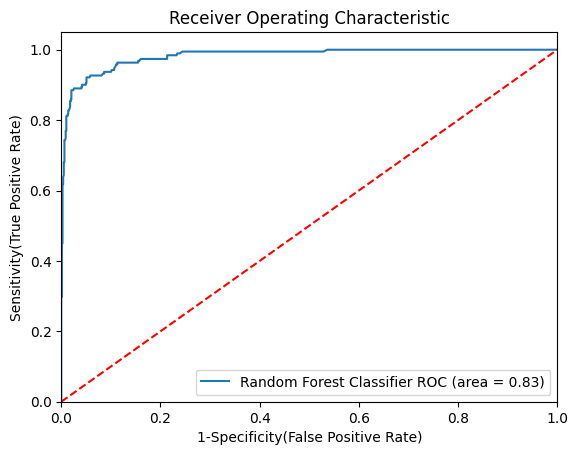

In [62]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Random Forest Classifier',
    'model': RandomForestClassifier(n_estimators=1000,min_samples_split=2,
                                          max_features=7,max_depth=None),
    'auc':  0.8325
},
    
]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(x_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 
                                   